In [116]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model

from keras.layers import Dropout, Flatten, Dense, Conv2D, Input
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from sklearn.metrics import confusion_matrix

In [117]:
path = 'car_make_images/'
training_path = path + 'train'
testing_path = path + 'test'
validation_path = path + 'val'

In [118]:
# img = Image.open(f"{training_path}/Audi/1_Audi.jpg")
# img

In [119]:
# Preprocesamos la imagen, para poder usar ImageDataGenerator la imagen debe de tener 4 dimensiones

img = np.asarray(img)
print(img.shape)

img = img / 255
print(img.shape)

h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]

img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(1290, 1893, 3)
(1290, 1893, 3)
(1, 1290, 1893, 3)


KeyboardInterrupt: 

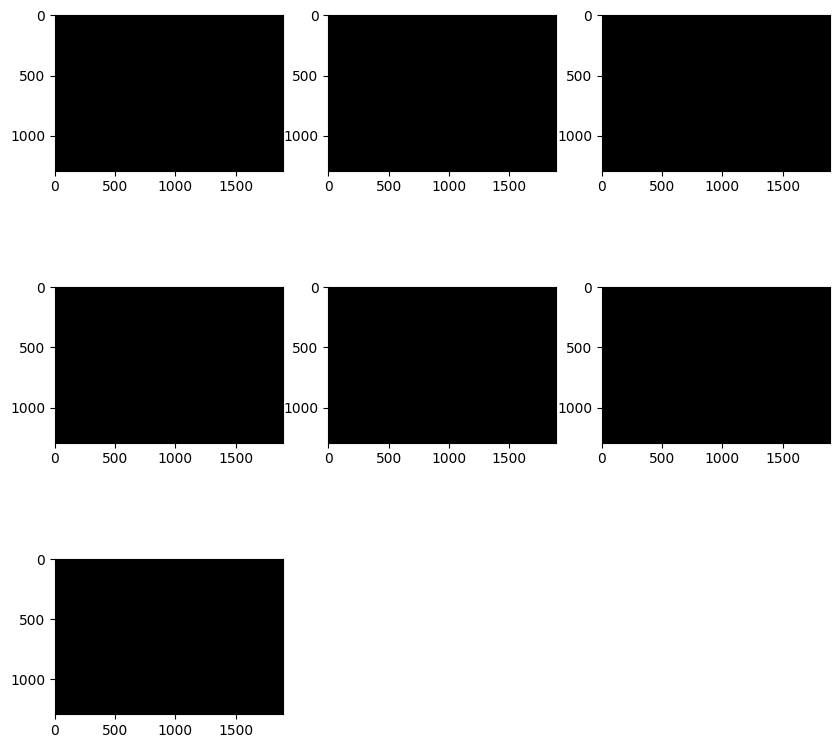

In [120]:
# ImageDataGenerator nos genera imagenes del gato editado 9 veces de diferente forma

batch_size = 9

# Inicializamos ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range = 359,
                              shear_range = 0.2,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              vertical_flip = True,
                              preprocessing_function = None)
# Entrenamos
data_gen.fit(img)

plt.figure(figsize = (10, 10)) 

for x, img_batch in enumerate(data_gen.flow(img, batch_size = batch_size)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x += 1    
    if x >= batch_size:
        break
        
plt.show()

In [ ]:
# Inicializamos los ImageDataGenerator

training_data_generator = ImageDataGenerator(rescale = 1./255,
                              rotation_range = 359,
                              shear_range = 0.2,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              vertical_flip = True,
                              preprocessing_function = None)

validation_data_generator = ImageDataGenerator(rescale = 1./255)  # Removed augmentation
test_data_generator = ImageDataGenerator(rescale = 1./255)  # Removed augmentation

In [ ]:
# Entrenamos los ImageDataGenerator

# Para poder usar .flow_from_directory(), necesitamos tener las carpetas ordenadas, es decir:

# una carpeta de train con una carpeta de imagenes para cada clase
# una carpeta de validation con una carpeta de imagenes para cada clase
# y una carpeta de test con una carpeta de imagenes para cada clase

size = 200
batch_size = 30  # For example
num_classes = 39  # Change to the number of classes you actually have

training_generator = training_data_generator.flow_from_directory(training_path,
                                                                 target_size = (size, size),
                                                                 batch_size = 30,
                                                                 class_mode = "categorical")

validation_generator = validation_data_generator.flow_from_directory(validation_path,
                                                                     target_size = (size, size),
                                                                     batch_size = 1,
                                                                     class_mode = "categorical")

test_generator = test_data_generator.flow_from_directory(testing_path,
                                                         target_size = (size, size),
                                                         batch_size = 1,
                                                         class_mode = "categorical")

# En caso de que la clasificación sea multi-clase, el cambiamos el parámetro class_mode = "categorical"

Found 11573 images belonging to 39 classes.
Found 2813 images belonging to 39 classes.
Found 2871 images belonging to 39 classes.


In [ ]:
model = Sequential()

model.add(Input(shape = (size, size, 3)))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(units = 120, activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(units = num_classes, activation = "softmax"))  # Changed to 'softmax'

In [ ]:
# Model Compilation
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Model Training
history = model.fit(training_generator, epochs = 1, validation_data = validation_generator)

2023-08-21 16:58:58.335449: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 76800000 exceeds 10% of free system memory.


386/386 [==============================] - 464s 1s/step - loss: 3.6490 - accuracy: 0.0411 - val_loss: 3.6264 - val_accuracy: 0.0462


In [ ]:
y_hat = model.predict(test_generator)

y_hat

2871/2871 [==============================] - 17s 6ms/step


array([[0.02542182, 0.03315908, 0.02975101, ..., 0.02701325, 0.02419386,
        0.02983034],
       [0.02569048, 0.03183637, 0.02918951, ..., 0.02696059, 0.02452516,
        0.02932818],
       [0.02542733, 0.03139143, 0.02882598, ..., 0.02723903, 0.02453831,
        0.02929207],
       ...,
       [0.02606062, 0.03189157, 0.02901446, ..., 0.02692487, 0.02464389,
        0.02940105],
       [0.02549326, 0.03205562, 0.02869856, ..., 0.02678688, 0.02427066,
        0.02887865],
       [0.02581005, 0.0310336 , 0.02873844, ..., 0.02710605, 0.02466455,
        0.02908687]], dtype=float32)

In [ ]:
y_test = test_generator.labels

y_test

array([ 0,  0,  0, ..., 38, 38, 38], dtype=int32)

In [ ]:
# thresh = 0.5

# y_hat = [0 if pred < thresh else 1 for pred in y_hat]

# y_hat

In [ ]:
confusion_matrix(y_test, y_hat)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize variables
y_true = []
y_pred = []

# Loop over each batch of test data
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator.next()
    y_true_batch = np.argmax(y_batch, axis=1)
    y_pred_batch = model.predict(X_batch)
    y_pred_batch = np.argmax(y_pred_batch, axis=1)
    
    y_true.extend(y_true_batch)
    y_pred.extend(y_pred_batch)

    # Stop at the end of the dataset
    if test_generator.batch_index == 0:
        break

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

print('Confusion Matrix:')
print(cm)

1/1 [==============================] - 0s 14ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
for row in cm:
    print(''.join([str(x) for x in row]))

0000000000000000000000780000000000000000
00000000000000000000001000000000000000000
0000000000000000000000880000000000000000
0000000000000000000000870000000000000000
0000000000000000000000610000000000000000
0000000000000000000000640000000000000000
0100000000000000000000360000000000000000
0000000000000000000000600000000000000000
0000000000000000000000520000000000000000
0000000000000000000000890000000000000000
0000000000000000000000780000000000000000
0000000000000000000000600000000000000000
0000000000000000000000760000000000000000
0000000000000000000000780000000000000000
0000000000000000000000980000000000000000
0000000000000000000000530000000000000000
0000000000000000000000790000000000000000
0000000000000000000000830000000000000000
00000000000000000000001010000000000000000
0000000000000000000000560000000000000000
0000000000000000000000630000000000000000
0000000000000000000000920000000000000000
00000000000000000000001280000000000000000
0000000000000000000000380000000000000000
0000000000000

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
